# **BRITISH AIRWAYS REVIEWS ANALYSIS**
##### **by Lucila Aldana Quiñonez | Marketing Data Analyst**
# **Sentiment Analysis**

In [2]:
# Install required libraries
!pip install pandas nltk matplotlib seaborn

In [3]:
# Import libraries and load the data
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [4]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lucil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [21]:
# Load the reviews dataset
reviews_df = pd.read_csv(
    r"C:\Users\lucil\Documents\Education\Data Analysis\Tableau\Projects Tableau\British Airways Customer Reviews Analysis - by Lucila Aldana Quiñonez _ Marketing Data Analyst\ba_reviews.csv"
)

# Ensure date column is of datetime type
reviews_df['date'] = pd.to_datetime(
    reviews_df['date'],
    errors='coerce',
    dayfirst=True
)

# Combine header + content into one text field
reviews_df['full_review'] = reviews_df['header'].fillna('') + '. ' + reviews_df['content'].fillna('')

# Keep what is needed
reviews_df = reviews_df[['full_review', 'recommended', 'date']]
reviews_df.dropna(subset=['full_review'], inplace=True)

# Overview the data
reviews_df.info()
reviews_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   full_review  1324 non-null   object        
 1   recommended  1324 non-null   object        
 2   date         1324 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 31.2+ KB


,full_review,recommended,date
0,service was mediocre at best. Just returned f...,no,2023-10-03
1,BA standards continue to decline. BA standar...,no,2023-10-02
2,"won the race to the bottom"" . Awful. Busines...",no,2023-10-02
3,Not a reliable airline. Not a reliable airli...,no,2023-10-02
4,Very disappointed. The airplanes and the loun...,no,2023-09-28


In [22]:
# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [23]:
# Compute sentiment scores
reviews_df['sentiment_score'] = reviews_df['full_review'].apply(
    lambda text: sia.polarity_scores(text)['compound']
)

In [24]:
# Classify sentiment
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

reviews_df['sentiment'] = reviews_df['sentiment_score'].apply(classify_sentiment)

In [25]:
# Validate the results
pd.crosstab(reviews_df['sentiment'], reviews_df['recommended'], normalize='columns')

recommended,no,yes
sentiment,,
Negative,0.602394,0.069930
Neutral,0.018617,0.003497
Positive,0.378989,0.926573


In [26]:
# Sentiment distribution
reviews_df['sentiment'].value_counts(normalize=True)

sentiment
Positive    0.615559
Negative    0.372356
Neutral     0.012085
Name: proportion, dtype: float64

In [27]:
# Sentiment by recommendation status
pd.crosstab(reviews_df['sentiment'], reviews_df['recommended'])

recommended,no,yes
sentiment,,
Negative,453,40
Neutral,14,2
Positive,285,530


In [30]:
# Export results to a .csv file
reviews_df.to_csv("reviews_with_sentiment.csv", index=False)

print("CSV file saved successfully.")

CSV file saved successfully.


# **Sentiment Analysis Over Time**

In [51]:
# Import the sentiment dataset
sentiment_df = pd.read_csv(
    r"C:\Users\lucil\Documents\Education\Data Analysis\Tableau\Projects Tableau\British Airways Customer Reviews Analysis - by Lucila Aldana Quiñonez _ Marketing Data Analyst\reviews_with_sentiment.csv"
)

# Ensure date column is of datetime type
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], errors='coerce')

# Extract year
sentiment_df['year'] = sentiment_df['date'].dt.year

# Overview the data
sentiment_df.info()
sentiment_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   full_review      1324 non-null   object        
 1   recommended      1324 non-null   object        
 2   date             1324 non-null   datetime64[ns]
 3   sentiment_score  1324 non-null   float64       
 4   sentiment        1324 non-null   object        
 5   year             1324 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 57.0+ KB


,full_review,recommended,date,sentiment_score,sentiment,year
0,service was mediocre at best. Just returned f...,no,2023-10-03,0.8933,Positive,2023
1,BA standards continue to decline. BA standar...,no,2023-10-02,-0.6428,Negative,2023
2,"won the race to the bottom"" . Awful. Busines...",no,2023-10-02,-0.4997,Negative,2023
3,Not a reliable airline. Not a reliable airli...,no,2023-10-02,-0.6281,Negative,2023
4,Very disappointed. The airplanes and the loun...,no,2023-09-28,-0.9319,Negative,2023


In [43]:
# Aggregate sentiment by year
sentiment_by_year = (
    sentiment_df
    .groupby(['year', 'sentiment'])
    .size()
    .reset_index(name='count')
)

In [44]:
# Sentiment distribution over time
pivot_counts = sentiment_by_year.pivot(
    index='year',
    columns='sentiment',
    values='count'
).fillna(0)

pivot_pct = pivot_counts.div(
    pivot_counts.sum(axis=1), axis=0
) * 100

pivot_pct

sentiment,Negative,Neutral,Positive
year,,,
2016,36.507937,0.000000,63.492063
2017,38.931298,1.781170,59.287532
2018,35.648148,0.925926,63.425926
2019,32.110092,1.376147,66.513761
2020,36.363636,3.636364,60.000000
2021,38.636364,0.000000,61.363636
2022,39.449541,0.917431,59.633028
2023,44.000000,1.000000,55.000000


In [41]:
# Export results to a .csv file
sentiment_by_year.to_csv("sentiment_by_year.csv", index=False)

print("CSV file saved successfully.")

CSV file saved successfully.


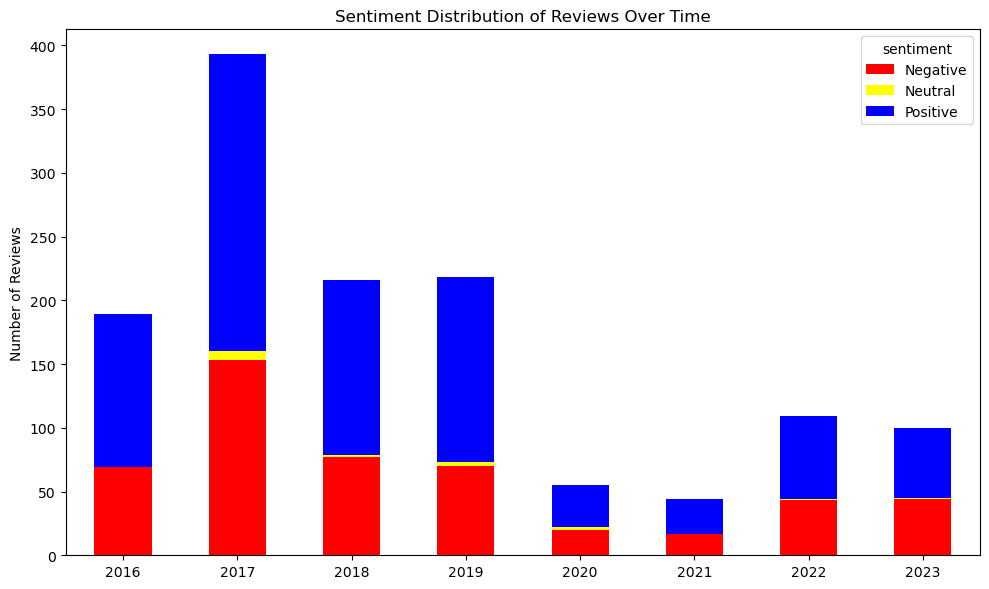

In [50]:
# Visualize the sentiment distribution over time
pivot_df = sentiment_by_year.pivot(
    index='year',
    columns='sentiment',
    values='count'
).fillna(0)

# Set plot colors
colors = ['red', 'yellow', 'blue']

# Plot
pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=colors
)

# Set labels
plt.title('Sentiment Distribution of Reviews Over Time')
plt.xlabel('')
plt.ylabel('Number of Reviews')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig("sentiment_over_time.jpg", dpi=300)
plt.show()